In [26]:
import pickle
import pandas as pd
import numpy as np
import astropy
import sunpy
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import seaborn as sns
#make figures bigger
plt.rcParams["figure.figsize"] = (10,5)

# Open Dataset

In [27]:
filtered_ic = pd.read_csv('helio4cast_icmecat.csv')

# ICME Start time in different formats

In [28]:
icme_start_time_dt = pd.to_datetime(filtered_ic.icme_start_time)
icme_start_time_num = parse_time(filtered_ic.icme_start_time).datetime

# Create Plots

### Heliocentric Distance

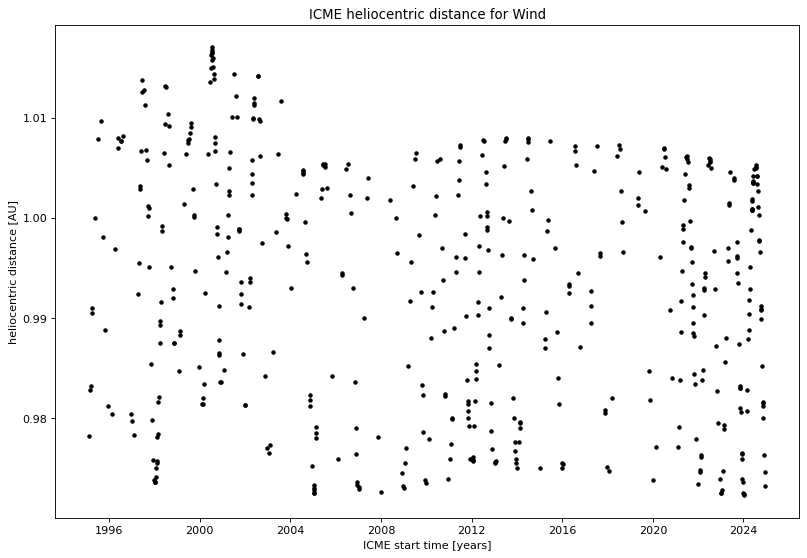

In [29]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.title('ICME heliocentric distance for Wind')
plt.plot(icme_start_time_num, filtered_ic.mo_sc_heliodistance, 'ok', markersize=3)
plt.ylabel('heliocentric distance [AU]')
plt.xlabel('ICME start time [years]')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.show()

### Heliocentric plot of ICME events

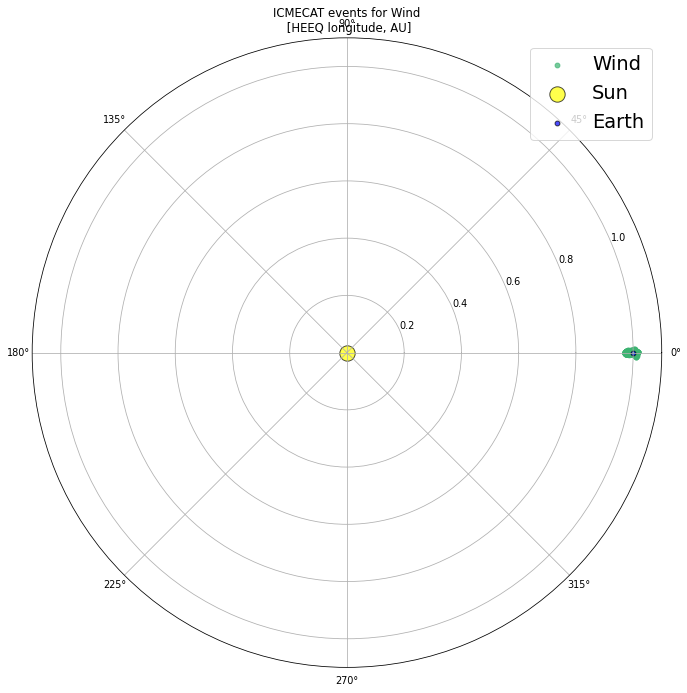

In [30]:
fig=plt.figure(figsize=(15,10), dpi=70)
ax = plt.subplot(111,projection='polar')

plt.title('ICMECAT events for Wind\n [HEEQ longitude, AU]')

#markersize
ms=25
#alpha
al=0.7
ax.scatter(np.radians(filtered_ic.mo_sc_long_heeq),filtered_ic.mo_sc_heliodistance,s=ms,c='mediumseagreen', alpha=al, label='Wind')
ax.scatter(0,0,s=ms*10,c='yellow', edgecolors='black', alpha=al, label='Sun')
ax.scatter(0,1,s=ms,c='blue', edgecolors='black', alpha=al, label='Earth')
plt.ylim([0,1.1])
plt.tight_layout()
plt.legend(loc='upper right', fontsize=20)
plt.show()


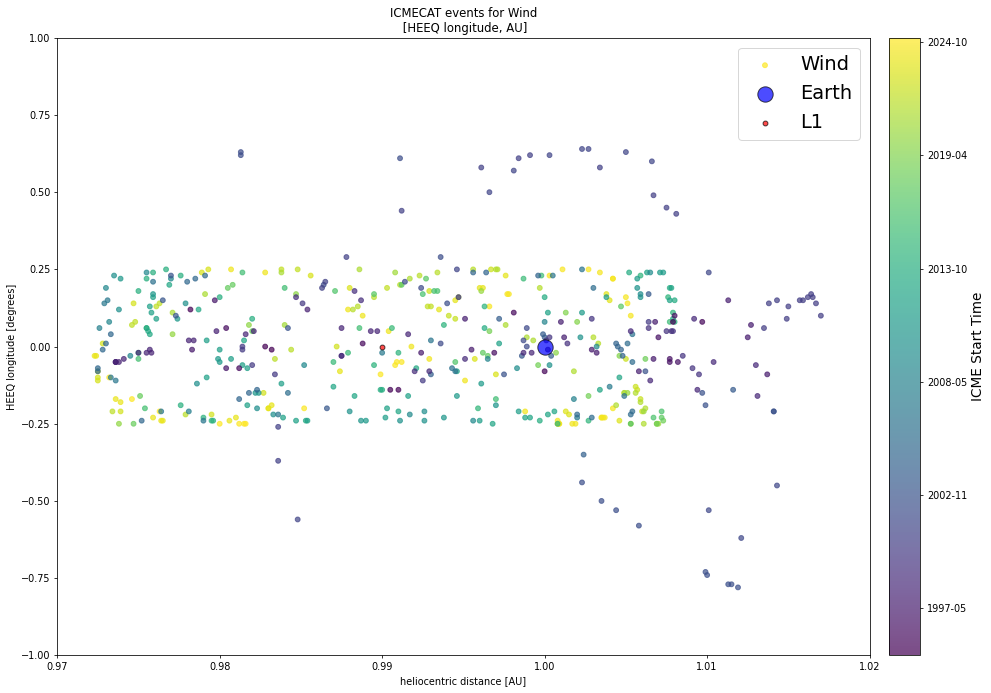

In [31]:
import matplotlib.dates as mdates
from matplotlib.cm import viridis  # Or any colormap you prefer
from matplotlib.colors import Normalize

# color code the time
time_float = mdates.date2num(icme_start_time_num)
norm = Normalize(vmin=time_float.min(), vmax=time_float.max())
cmap = plt.cm.viridis

fig=plt.figure(figsize=(15,10), dpi=70)
ax = plt.subplot(111)

plt.title('ICMECAT events for Wind\n [HEEQ longitude, AU]')

#markersize
ms=25
#alpha
al=0.7
sc = ax.scatter(
    filtered_ic.mo_sc_heliodistance,
    filtered_ic.mo_sc_long_heeq,
    c=time_float,
    cmap=cmap,
    norm=norm,
    s=ms,
    alpha=al,
    label='Wind'
)
ax.scatter(1,0,s=ms*10,c='blue', edgecolors='black', alpha=al, label='Earth')
ax.scatter(0.989998,0,s=ms,c='red', edgecolors='black', alpha=al, label='L1')
# Zoom-in to ±3° and r ± 0.1 AU
ax.set_ylim(-1,1)   # degrees
ax.set_xlim(0.97, 1.02) # AU
ax.set_xlabel('heliocentric distance [AU]')
ax.set_ylabel('HEEQ longitude [degrees]')
# Add colorbar with formatted date ticks
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('ICME Start Time', fontsize=14)
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.legend(loc='upper right', fontsize=20)
plt.show()

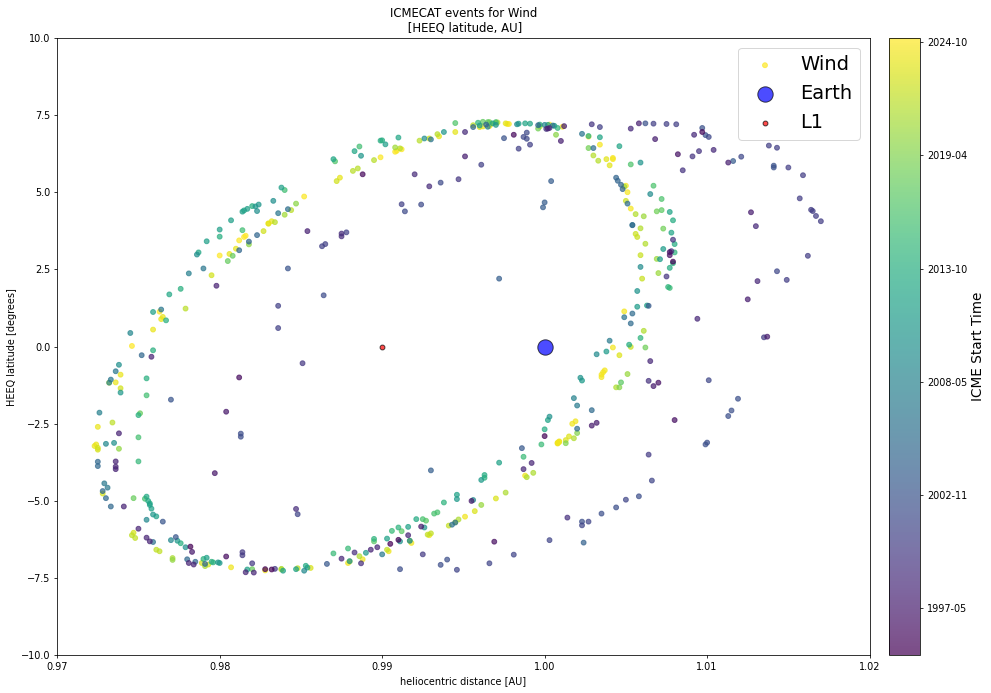

In [32]:
fig=plt.figure(figsize=(15,10), dpi=70)
ax = plt.subplot(111)

plt.title('ICMECAT events for Wind\n [HEEQ latitude, AU]')

#markersize
ms=25
#alpha
al=0.7
sc = ax.scatter(
    filtered_ic.mo_sc_heliodistance,
    filtered_ic.mo_sc_lat_heeq,
    c=time_float,
    cmap=cmap,
    norm=norm,
    s=ms,
    alpha=al,
    label='Wind'
)
ax.scatter(1,0,s=ms*10,c='blue', edgecolors='black', alpha=al, label='Earth')
ax.scatter(0.989998,0,s=ms,c='red', edgecolors='black', alpha=al, label='L1')
# Zoom-in to ±3° and r ± 0.1 AU
ax.set_ylim(-10,10)   # degrees
ax.set_xlim(0.97, 1.02) # AU
ax.set_xlabel('heliocentric distance [AU]')
ax.set_ylabel('HEEQ latitude [degrees]')
# Add colorbar with formatted date ticks
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('ICME Start Time', fontsize=14)
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.legend(loc='upper right', fontsize=20)
plt.show()

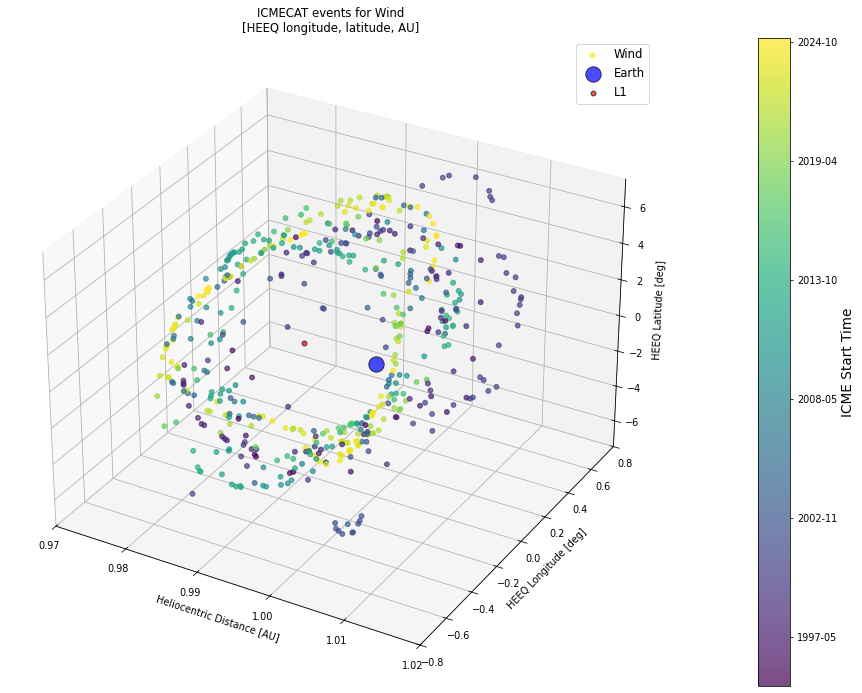

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

# 3D figure setup
fig = plt.figure(figsize=(15, 10), dpi=70)
ax = fig.add_subplot(111, projection='3d')

plt.title('ICMECAT events for Wind\n[HEEQ longitude, latitude, AU]')

# Markersize and alpha
ms = 25
al = 0.7

# 3D scatter plot
sc = ax.scatter(
    filtered_ic.mo_sc_heliodistance,
    filtered_ic.mo_sc_long_heeq,
    filtered_ic.mo_sc_lat_heeq,
    c=time_float,
    cmap=cmap,
    norm=norm,
    s=ms,
    alpha=al,
    label='Wind'
)

# Plot Earth and L1 in 3D space
ax.scatter(1, 0, 0, s=ms*10, c='blue', edgecolors='black', alpha=al, label='Earth')
ax.scatter(0.989998, 0, 0, s=ms, c='red', edgecolors='black', alpha=al, label='L1')

# Axes labels
ax.set_xlabel('Heliocentric Distance [AU]')
ax.set_ylabel('HEEQ Longitude [deg]')
ax.set_zlabel('HEEQ Latitude [deg]')

# Zoom region if needed
ax.set_xlim(0.97, 1.02)
ax.set_ylim(-0.8, 0.8)
ax.set_zlim(-7.5, 7.5)

# Colorbar with date formatting
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('ICME Start Time', fontsize=14)

# Custom date formatter for colorbar
def format_date(x, pos=None):
    return mdates.num2date(x).strftime('%Y-%m')

cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_date))

# Legend
ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

In [35]:
import plotly.express as px
import plotly.graph_objects as go

# Convert datetime to float for linear scaling (days since epoch)
event_time_dt = pd.to_datetime(icme_start_time_num)
event_time_numeric = (event_time_dt - pd.Timestamp("1970-01-01")) / pd.Timedelta(days=1)

# Also create string labels for hover
event_dates_str = event_time_dt.strftime('%Y-%m-%d')

# Convert degrees to radians
lon_rad = np.radians(filtered_ic.mo_sc_long_heeq)
lat_rad = np.radians(filtered_ic.mo_sc_lat_heeq)
r = filtered_ic.mo_sc_heliodistance  # in AU

# Spherical to Cartesian
x = r * np.cos(lat_rad) * np.cos(lon_rad)
y = r * np.cos(lat_rad) * np.sin(lon_rad)
z = r * np.sin(lat_rad)

## Create DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z,
    'Event Time Numeric': event_time_numeric,
    'Event Time Label': event_dates_str,
    'Event Time': event_time_dt
})


# Main scatter plot with linear color mapping
fig = px.scatter_3d(
    df,
    x='x', y='y', z='z',
    color='Event Time Numeric',  # linear numeric scale
    color_continuous_scale='Viridis',
    title='ICMECAT Events for Wind (HEEQ Coordinates)',
    labels={
        'X': 'X [AU]',
        'Y': 'Y [AU]',
        'Z': 'Z [AU]',
        'Event Time Numeric': 'Event Time'
    },
    hover_name='Event Time Label',
    hover_data={'Event Time Numeric': False},
    width=800,  # Set figure width
    height=600  # Set figure height
)

# Earth marker (larger, blue)
fig.add_trace(go.Scatter3d(
    x=[1.0], y=[0], z=[0],
    mode='markers+text',
    marker=dict(size=10, color='blue', line=dict(color='black', width=2)),
    text=['Earth'],
    textposition='top center',
    name='Earth',
    hoverinfo='text'
))

# Manually set colorbar ticks to formatted dates
tick_vals = np.linspace(event_time_numeric.min(), event_time_numeric.max(), 5)
tick_text = [pd.to_datetime(int(val), origin='unix', unit='D').strftime('%Y-%m') for val in tick_vals]

fig.update_layout(coloraxis_colorbar=dict(
    title='Event Time',
    tickvals=tick_vals,
    ticktext=tick_text
))

# L1 marker (smaller, red)
fig.add_trace(go.Scatter3d(
    x=[0.989998], y=[0], z=[0],
    mode='markers+text',
    marker=dict(size=5, color='red', line=dict(color='black', width=1)),
    text=['L1'],
    textposition='top center',
    name='L1',
    hoverinfo='text'
))

# Customize layout
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X: [AU]', range=[np.min(x), np.max(x)]),
        yaxis=dict(title='Y: [AU]', range=[np.min(y), np.max(y)]),
        zaxis=dict(title='Z: [AU]', range=[np.min(z), np.max(z)])
    ),
    legend=dict(x=0.8, y=0.9),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()